C:\Users\Marianne\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


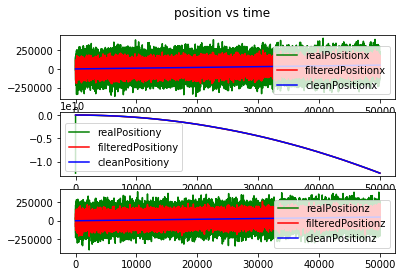

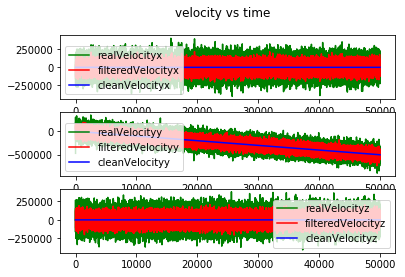

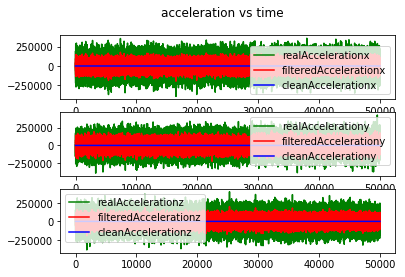

In [14]:
#!/usr/bin/python3

"""Filters out and cleans up suspicious/noisy data from a stream."""

import numpy
import matplotlib.pyplot as plt
import random

initialPosition = [0,0,0]
initialVelocity = [1,100,1]
MatrixSize = 100000
whiteNoiseSTDev = 90000
deltaT = 0.5

stateTransition = numpy.array(([[[1, 1, 1], [deltaT, deltaT, deltaT], [0, 0.5*deltaT**2, 0]], [[0, 0, 0], [1, 1, 1], [0, deltaT, 0]], [[0, 0, 0], [0, 0, 0], [0, 1, 0]]]))

def main():
    
    measuredStates = dataGenerator(initialPosition, initialVelocity, deltaT, MatrixSize, whiteNoiseSTDev, stateTransition)
    
    whiteNoise = whiteNoiseGenerator(whiteNoiseSTDev, MatrixSize)

    randPosition = [random.randint(0,10), random.randint(0,10), random.randint(0,10)]
    randVelocity = [random.randint(0,10), random.randint(0,10), random.randint(0,10)]
    randProcess  = dataGenerator(randPosition, randVelocity, deltaT, MatrixSize, whiteNoiseSTDev, stateTransition)
    
    staticPositionData     = dataProcessor(0, whiteNoise)
    staticVelocityData     = dataProcessor(1, whiteNoise)
    staticAccelerationData = dataProcessor(2, whiteNoise)
    
    movingPositionData     = dataProcessor(0, randProcess)
    movingVelocityData     = dataProcessor(1, randProcess)
    movingAccelerationData = dataProcessor(2, randProcess)
    
    DEMO = Physics_Filter()
    
    DEMO.setupKalmanFilterDEMO(staticPositionData, staticVelocityData, staticAccelerationData, movingPositionData, movingVelocityData, movingAccelerationData)
    DEMO.priorState = measuredStates[0]

    filteredData = numpy.zeros((MatrixSize,3,3))

    state = 0
    
    while state<MatrixSize:
        filteredData[state] = DEMO.KalmanFilterxvaDEMO(measuredStates[state], deltaT, stateTransition)
        state = state+1
        
    cleanData = canonSimulator(initialPosition, initialVelocity, deltaT, MatrixSize, stateTransition)
    
    realData = measuredStates
    
    realPosition     = dataProcessor(0, realData)
    realVelocity     = dataProcessor(1, realData)
    realAcceleration = dataProcessor(2, realData)
    
    filteredPosition     = dataProcessor(0, filteredData)
    filteredVelocity     = dataProcessor(1, filteredData)
    filteredAcceleration = dataProcessor(2, filteredData)
    
    cleanPosition     = dataProcessor(0, cleanData)
    cleanVelocity     = dataProcessor(1, cleanData)
    cleanAcceleration = dataProcessor(2, cleanData)

    realPositionx = dataProcessor(0, realPosition)
    realPositiony = dataProcessor(1, realPosition)
    realPositionz = dataProcessor(2, realPosition)
    
    realVelocityx = dataProcessor(0, realVelocity)
    realVelocityy = dataProcessor(1, realVelocity)
    realVelocityz = dataProcessor(2, realVelocity)
    
    realAccelerationx = dataProcessor(0, realAcceleration)
    realAccelerationy = dataProcessor(1, realAcceleration)
    realAccelerationz = dataProcessor(2, realAcceleration)
    
    filteredPositionx = dataProcessor(0, filteredPosition)
    filteredPositiony = dataProcessor(1, filteredPosition)
    filteredPositionz = dataProcessor(2, filteredPosition)
    
    filteredVelocityx = dataProcessor(0, filteredVelocity)
    filteredVelocityy = dataProcessor(1, filteredVelocity)
    filteredVelocityz = dataProcessor(2, filteredVelocity)
    
    filteredAccelerationx = dataProcessor(0, filteredAcceleration)
    filteredAccelerationy = dataProcessor(1, filteredAcceleration)
    filteredAccelerationz = dataProcessor(2, filteredAcceleration)
    
    cleanPositionx = dataProcessor(0, cleanPosition)
    cleanPositiony = dataProcessor(1, cleanPosition)
    cleanPositionz = dataProcessor(2, cleanPosition)
    
    cleanVelocityx = dataProcessor(0, cleanVelocity)
    cleanVelocityy = dataProcessor(1, cleanVelocity)
    cleanVelocityz = dataProcessor(2, cleanVelocity)
    
    cleanAccelerationx = dataProcessor(0, cleanAcceleration)
    cleanAccelerationy = dataProcessor(1, cleanAcceleration)
    cleanAccelerationz = dataProcessor(2, cleanAcceleration)
    
    T = numpy.arange(0, MatrixSize*deltaT, deltaT)
    
    plt.figure(1)
    plt.figure(1).suptitle("position vs time")
    plt.subplot(311)
    plt.plot(T, realPositionx, 'g', label="realPositionx")
    plt.plot(T, filteredPositionx,'r', label="filteredPositionx")
    plt.plot(T, cleanPositionx, 'b', label="cleanPositionx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realPositiony, 'g', label="realPositiony")
    plt.plot(T, filteredPositiony, 'r', label="filteredPositiony")
    plt.plot(T, cleanPositiony, 'b', label="cleanPositiony")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realPositionz, 'g', label="realPositionz")
    plt.plot(T, filteredPositionz, 'r', label="filteredPositionz")
    plt.plot(T, cleanPositionz, 'b', label="cleanPositionz")
    plt.legend(loc='best')
    
    plt.figure(2)
    plt.figure(2).suptitle("velocity vs time")
    plt.subplot(311)
    plt.plot(T, realVelocityx, 'g', label="realVelocityx")
    plt.plot(T, filteredVelocityx, 'r', label="filteredVelocityx")
    plt.plot(T, cleanVelocityx, 'b', label="cleanVelocityx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realVelocityy, 'g', label="realVelocityy")
    plt.plot(T, filteredVelocityy, 'r', label="filteredVelocityy")
    plt.plot(T, cleanVelocityy, 'b', label="cleanVelocityy")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realVelocityz, 'g', label="realVelocityz")
    plt.plot(T, filteredVelocityz, 'r', label="filteredVelocityz")
    plt.plot(T, cleanVelocityz, 'b', label="cleanVelocityz")
    plt.legend(loc='best')

    plt.figure(3)
    plt.figure(3).suptitle("acceleration vs time")
    plt.subplot(311)
    plt.plot(T, realAccelerationx, 'g', label="realAccelerationx")
    plt.plot(T, filteredAccelerationx, 'r', label="filteredAccelerationx")
    plt.plot(T, cleanAccelerationx, 'b', label="cleanAccelerationx")
    plt.legend(loc='best')
    plt.subplot(312)
    plt.plot(T, realAccelerationy, 'g', label="realAccelerationy")
    plt.plot(T, filteredAccelerationy, 'r', label="filteredAccelerationy")
    plt.plot(T, cleanAccelerationy, 'b', label="cleanAccelerationy")
    plt.legend(loc='best')
    plt.subplot(313)
    plt.plot(T, realAccelerationz, 'g', label="realAccelerationz")
    plt.plot(T, filteredAccelerationz, 'r', label="filteredAccelerationz")
    plt.plot(T, cleanAccelerationz, 'b', label="cleanAccelerationz")
    plt.legend(loc='best')
    
    plt.figure(1).show()
    plt.figure(2).show()
    plt.figure(3).show()

def dataProcessor(spot, array):
    
    data = [x[spot] for x in array]
    
    return data
 
def whiteNoiseGenerator(std, matrixSize):
    
    return numpy.random.normal( 0, std, size=(matrixSize,3,3))
    
def canonSimulator(initialPos, initialVel, deltaT, matrixSize, stateTransition):
    
    measuredState       = numpy.zeros((matrixSize,3,3))
    initialAcceleration = [0,-9.98,0]
    initialState        = numpy.array((initialPos, initialVel, initialAcceleration))
    measuredState[0]    = initialState
    
    outerIndex = 0
    while outerIndex < 3:
        innerIndex = 0
        while innerIndex < (matrixSize-1): 
        
            measuredState[innerIndex+1,:,outerIndex] = numpy.dot(stateTransition[:,:,outerIndex],measuredState[innerIndex,:,outerIndex])
            innerIndex = innerIndex+1
        outerIndex = outerIndex+1   
        
    return measuredState

def dataGenerator(initialPos, initialVel, deltaT, matrixSize, whiteNoiseSTD, stateTransition):
    
    whiteNoise           = whiteNoiseGenerator(whiteNoiseSTD, matrixSize)
    canonSimulation      = canonSimulator(initialPos, initialVel, deltaT, matrixSize, stateTransition)
    noisyCanonSimulation = canonSimulation + whiteNoise
    
    return noisyCanonSimulation

class Physics_Filter(object):
    
    def __init__(self):
        self.processNoise = 0                                           
        self.measurementNoise = 0                                       
        self.initialStateMatrix = 0                                     
        self.priorStateMatrix = 0                                       
        self.predictedStateMatrix = 0  
        self.deltaT = 0                                                 
        self.priorState = 0                                       
        self.predictedState = numpy.zeros((3,1,3))                                         
        self.KalmanGain = 0                                             
        
    def setupKalmanFilterDEMO(self, staticPositionData, staticVelocityData, staticAccelerationData, movingPositionData, movingVelocityData, movingAccelerationData):
        
        self.measurementNoise   = self.getCovarxva(staticPositionData, staticVelocityData, staticAccelerationData)
        self.initialStateMatrix = self.getCovarxva(movingPositionData, movingVelocityData, movingAccelerationData)
        self.priorStateMatrix   = self.initialStateMatrix
        
        confidenceFactor = 1
        self.processNoise = confidenceFactor*self.measurementNoise

    def KalmanFilterxvaDEMO(self, measuredState, deltaT, stateTransition):
        
        self.deltaT = deltaT
        self.predictxvaDEMO(stateTransition)
        priorState  = self.update(measuredState)
        
        return priorState

    def predictxvaDEMO(self, stateTransition):
        
        self.stateTransition = stateTransition 

        self.predictedState = numpy.zeros((3,3))
        
        index = 0
        while index < 3:
            self.predictedState[:,index] = numpy.dot(stateTransition[:,:,index],self.priorState[:,index])
            index = index+1
        
        intermediateMatrix = self.priorStateMatrix
        
        index = 0
        while index < 3:
            intermediateMatrix[:,index] = numpy.dot(self.stateTransition[:,:,index], self.priorStateMatrix[:, index])
            index = index+1
            
        index = 0
        self.predictedStateMatrix = self.priorStateMatrix
        while index < 3:
            self.predictedStateMatrix[:,index] = numpy.dot(intermediateMatrix[:,index], self.stateTransition[:,:,index].T) + self.processNoise[:,index]
            index = index+1
        
    def update(self, measuredState):
        
        scalingFactor = self.predictedStateMatrix+self.measurementNoise
        
        inv = scalingFactor

        index = 0

        while index < 3:
            inv[:,:,index] = numpy.linalg.inv(scalingFactor[:,:,index])
            index = index+1
        
        index = 0
        
        self.KalmanGain = self.predictedStateMatrix
        
        while index < 3:
            self.KalmanGain[:,:,index] = numpy.dot(self.predictedStateMatrix[:,:,index], inv[:,:,index])
            index = index+1
            
        index = 0
        
        while index < 3:
            self.priorState[:,index] = self.predictedState[:,index] + numpy.dot(self.KalmanGain[:,:,index],numpy.subtract(measuredState[:,index],self.predictedState[:,index]))
            index = index+1
        
        intermediateArray = self.KalmanGain
        
        index = 0
        
        while index < 3:
            intermediateArray[:,:,index] = numpy.dot(self.KalmanGain[:,:,index], self.predictedStateMatrix[:,:,index])
            index = index+1
            
        self.priorStateMatrix = numpy.subtract(self.predictedStateMatrix,intermediateArray)
        
        return self.priorState 
        
    def getVar(self, dataset):
        
        return numpy.var(dataset,axis=0)
    
    def getCovarxva(self, positionData, velocityData, accelerationData):
        
        covarMatrix = numpy.zeros((3,3,3))
        
        covarMatrix[0,0,:] = self.getVar(positionData)
        covarMatrix[1,1,:] = self.getVar(velocityData)
        covarMatrix[2,2,:] = self.getVar(accelerationData)
        
        return covarMatrix

    
if __name__ == "__main__":
    main()
